In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import seaborn as sns


## Création dataset et séparation des données utiles

In [2]:
df_games = pd.read_csv('data/games.csv')
df_games = df_games.sample(frac=1)

df_games.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [3]:
winner = df_games['winner']

df_pre_start = df_games[['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id', 't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id']]

df_post_start = df_games.iloc[:, [5, 6, 7, 8, 9, 10, 26, 27, 28, 29, 30, 51, 52, 53, 54, 55]]

In [4]:
df_pre_start.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51490 entries, 17841 to 24336
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   t1_champ1id  51490 non-null  int64
 1   t1_champ2id  51490 non-null  int64
 2   t1_champ3id  51490 non-null  int64
 3   t1_champ4id  51490 non-null  int64
 4   t1_champ5id  51490 non-null  int64
 5   t2_champ1id  51490 non-null  int64
 6   t2_champ2id  51490 non-null  int64
 7   t2_champ3id  51490 non-null  int64
 8   t2_champ4id  51490 non-null  int64
 9   t2_champ5id  51490 non-null  int64
dtypes: int64(10)
memory usage: 4.3 MB


In [5]:
df_post_start.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51490 entries, 17841 to 24336
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   firstBlood          51490 non-null  int64
 1   firstTower          51490 non-null  int64
 2   firstInhibitor      51490 non-null  int64
 3   firstBaron          51490 non-null  int64
 4   firstDragon         51490 non-null  int64
 5   firstRiftHerald     51490 non-null  int64
 6   t1_towerKills       51490 non-null  int64
 7   t1_inhibitorKills   51490 non-null  int64
 8   t1_baronKills       51490 non-null  int64
 9   t1_dragonKills      51490 non-null  int64
 10  t1_riftHeraldKills  51490 non-null  int64
 11  t2_towerKills       51490 non-null  int64
 12  t2_inhibitorKills   51490 non-null  int64
 13  t2_baronKills       51490 non-null  int64
 14  t2_dragonKills      51490 non-null  int64
 15  t2_riftHeraldKills  51490 non-null  int64
dtypes: int64(16)
memory usage: 6.7 MB


## Description dataset

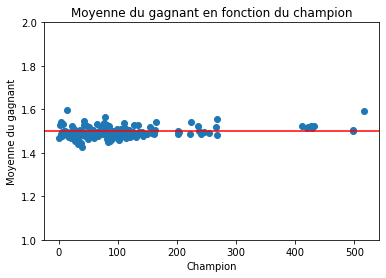

In [6]:
df_mean = df_games.groupby('t1_champ1id')['winner'].mean()
df_mean += df_games.groupby('t1_champ2id')['winner'].mean()
df_mean += df_games.groupby('t1_champ3id')['winner'].mean()
df_mean += df_games.groupby('t1_champ4id')['winner'].mean()
df_mean += df_games.groupby('t1_champ5id')['winner'].mean()
df_mean = df_mean/5

# tracer la moyenne du gagnant en fonction de t1_champ1id
plt.scatter(df_mean.index, df_mean.values)
plt.title('Moyenne du gagnant en fonction du champion')
plt.xlabel('Champion')
plt.ylabel('Moyenne du gagnant')
plt.ylim(1, 2)
plt.axhline(1.5, color = 'red')
plt.show()

In [7]:
def box_plot(data, ax, label_x = '', label_y = '', title = ''):
    ax.boxplot([data[i] for i in range(len(data)) if winner[i] == 1], positions=[1])
    ax.boxplot([data[i] for i in range(len(data)) if winner[i] == 2], positions=[2])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    ax.set_title(title)

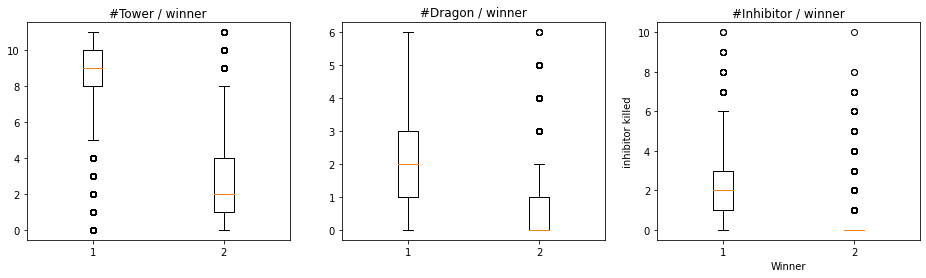

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

dragon = df_games['t1_dragonKills']
tower = df_games['t1_towerKills']
inhibitor = df_games['t1_inhibitorKills']


box_plot(tower, ax[0], label_x = 'Winner', label_y = 'Tower killed', title = '#Tower / winner')
box_plot(dragon, ax[1], label_x = 'Winner', label_y = 'Dragon killed', title = '#Dragon / winner')
box_plot(inhibitor, ax[2], label_x = 'Winner', label_y = 'inhibitor killed', title = '#Inhibitor / winner')

plt.show()

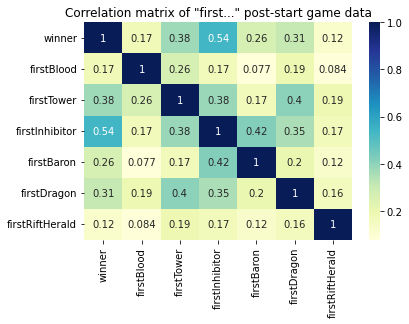

In [9]:
# Removing time of the game and adding winner
df_for_corr_first = df_games.iloc[:, [4, 5, 6, 7, 8, 9, 10]] 

ax = plt.axes()
sns.heatmap(df_for_corr_first.corr(), annot=True, cmap="YlGnBu")
ax.set_title('Correlation matrix of "first..." post-start game data')
plt.show()



In [10]:
#Vérification complétude du jeu de données

print(f"Number of null values in df_pre_start: {df_pre_start.isnull().sum().sum()}")
print(f"Number of null values in df_post_start: {df_post_start.isnull().sum().sum()}")
print(f"Different values in winner: {winner.unique()}")


Number of null values in df_pre_start: 0
Number of null values in df_post_start: 0
Different values in winner: [1 2]


In [13]:
winner.describe()

count    51490.000000
mean         1.493552
std          0.499963
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: winner, dtype: float64

In [14]:
df_post_start.describe()

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
count,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,1.471295,1.450631,1.308487,0.926510,1.442804,0.731676,5.699359,1.017537,0.372286,1.387182,0.251466,5.549466,0.985084,0.414547,1.404370,0.240105
std,0.520326,0.542848,0.676097,0.841424,0.569579,0.822526,3.799808,1.263934,0.583934,1.206818,0.433860,3.860989,1.256284,0.613768,1.224492,0.427151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000


# Data processing et benchmark

In [15]:
encoder = OneHotEncoder()
df_pre_start_encoded = encoder.fit_transform(df_pre_start)

In [29]:
x = df_pre_start_encoded
y = winner - 1 # Centralization of winner from 1 and 2 -> 0 and 1
# Now we want to know if team 2 wins (then y = 1 and y = 0 if team 2 loses)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)



Confusion matrix, without normalization
[[1437 1164]
 [1260 1288]]


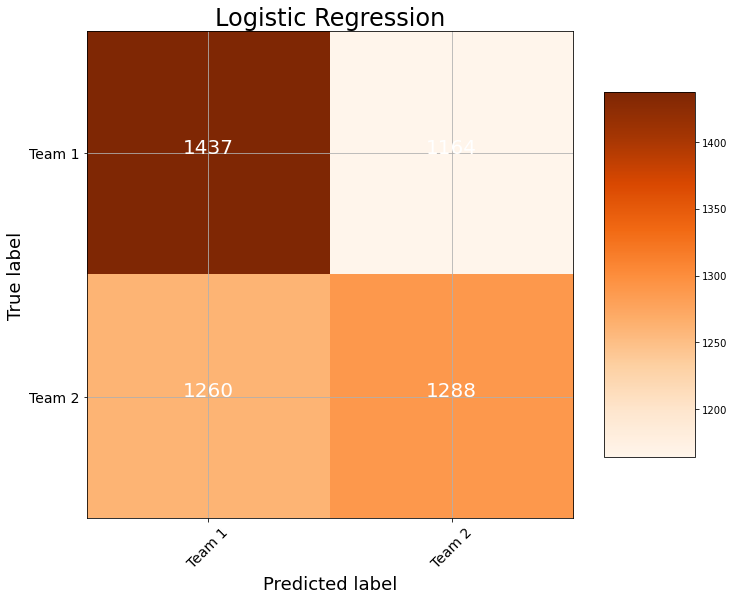

In [19]:
# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test) # something near 50% makes sense for a matchmaking only based on champs selected.

cm = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'Logistic Regression')

In [15]:
tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
tree.score(X_test, y_test)

0.5228199650417557

In [22]:
# Normalization of our data
df_post_start_normalized=(df_post_start-df_post_start.min())/(df_post_start.max()-df_post_start.min()) # Pandas automatically applies colomn-wise function
df_post_start_normalized

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
17841,0.5,0.5,0.0,0.5,0.5,0.0,0.454545,0.0,0.2,0.500000,0.0,0.363636,0.0,0.00,0.000000,0.0
911,1.0,0.5,0.5,1.0,1.0,0.0,0.727273,0.1,0.0,0.166667,0.0,0.454545,0.0,0.25,0.666667,0.0
33654,0.5,1.0,0.5,0.5,0.5,1.0,0.818182,0.2,0.2,0.500000,0.0,0.545455,0.0,0.00,0.333333,1.0
50087,1.0,1.0,0.5,0.5,1.0,1.0,0.727273,0.2,0.2,0.166667,0.0,0.545455,0.0,0.00,0.500000,1.0
30361,0.5,0.5,1.0,0.5,0.5,0.0,1.000000,0.3,0.4,0.833333,0.0,0.363636,0.1,0.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7144,1.0,1.0,1.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.909091,0.2,0.00,0.333333,1.0
10577,1.0,1.0,1.0,0.0,0.5,0.5,0.090909,0.0,0.0,0.333333,1.0,0.818182,0.1,0.00,0.000000,0.0
46391,0.5,1.0,1.0,1.0,0.5,1.0,0.090909,0.0,0.0,0.166667,0.0,0.909091,0.2,0.25,0.333333,1.0
7208,1.0,1.0,1.0,1.0,1.0,0.0,0.363636,0.0,0.0,0.166667,0.0,0.636364,0.1,0.50,0.666667,0.0


In [31]:
x = df_post_start_normalized
y = winner - 1 # Centralization of winner from 1 and 2 -> 0 and 1
# Now we want to know if team 2 wins (then y = 1 and y = 0 if team 2 loses)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [24]:
print(len(X_train), len(X_test))

36043 15447


In [25]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

### Logistic Regression

0.9606396063960639
Confusion matrix, without normalization
[[7468  394]
 [ 214 7371]]


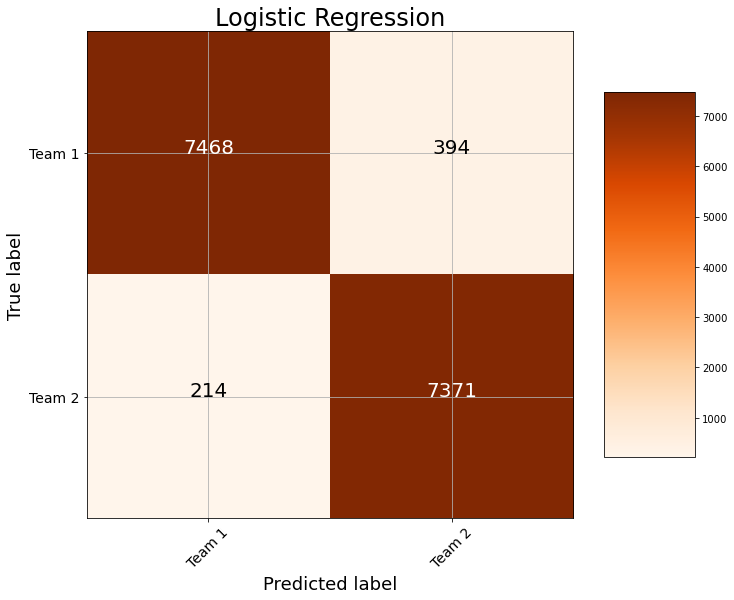

In [26]:
clf_lr = LogisticRegression().fit(X_train, y_train)
print(clf_lr.score(X_test, y_test)) # something near 50% makes sense for a matchmaking only based on champs selected.

cm = confusion_matrix(y_test, clf_lr.predict(X_test))
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'Logistic Regression')

### Decision Tree

0.5146630413672558
Confusion matrix, without normalization
[[1406 1274]
 [1225 1244]]


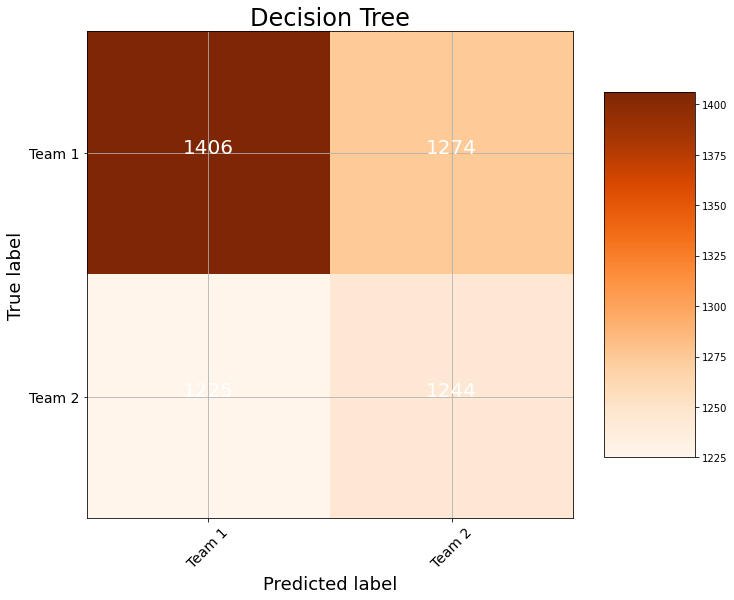

In [30]:
clf_dt = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train) 
print(clf_dt.score(X_test, y_test))

cm = confusion_matrix(y_test, clf_dt.predict(X_test))
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'Decision Tree')


### Naive Bayes

0.9374635851621674
Confusion matrix, without normalization
[[7388  415]
 [ 551 7093]]


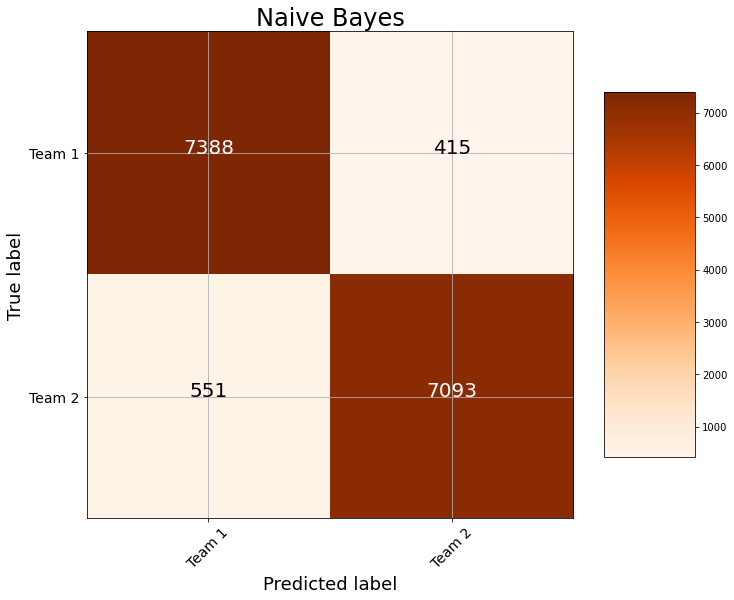

In [34]:
clf_nb = GaussianNB().fit(X_train, y_train)
print(clf_nb.score(X_test, y_test))

cm = confusion_matrix(y_test, clf_nb.predict(X_test))
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'Naive Bayes')

### RandomForest

0.9711270796918495
Confusion matrix, without normalization
[[7611  192]
 [ 254 7390]]


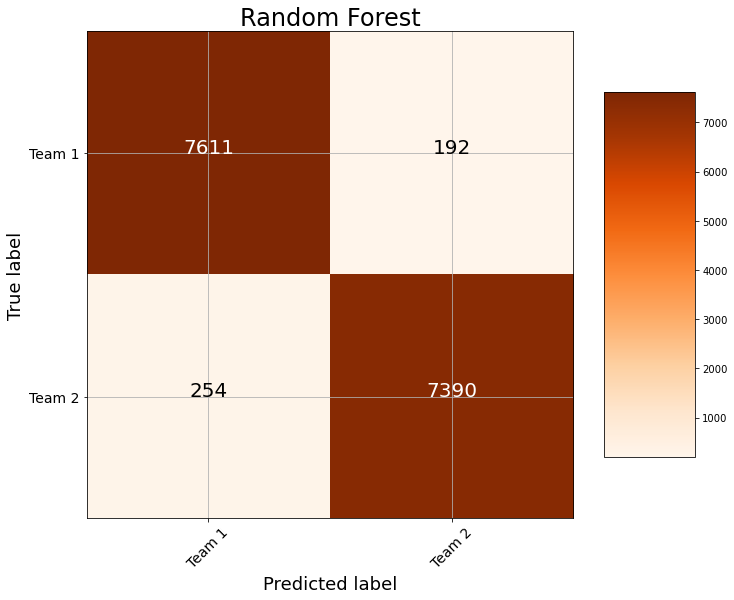

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier().fit(X_train, y_train)
print(clf_rf.score(X_test, y_test))

cm = confusion_matrix(y_test, clf_rf.predict(X_test))
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'Random Forest')


In [37]:
from sklearn.model_selection import RandomizedSearchCV
RSEED = 42 

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=42, scoring='roc_auc', verbose=1)

In [38]:
rs.best_params_

{'n_estimators': 126,
 'min_samples_split': 10,
 'max_leaf_nodes': 40,
 'max_features': 0.5,
 'max_depth': 17,
 'bootstrap': True}

In [39]:
best_model = rs.best_estimator_

train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [40]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 79
Average maximum depth 9


0.9734576293131353
Confusion matrix, without normalization
[[7617  186]
 [ 224 7420]]


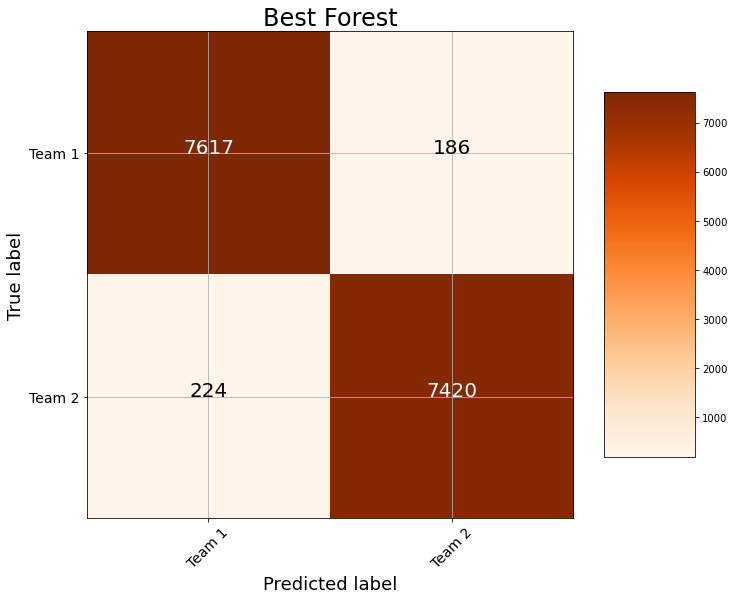

In [41]:
print(best_model.score(X_test, y_test))

cm = confusion_matrix(y_test, best_model.predict(X_test))
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'Best Forest')

### K neighbors

Confusion matrix, without normalization
[[7482  321]
 [ 293 7351]]


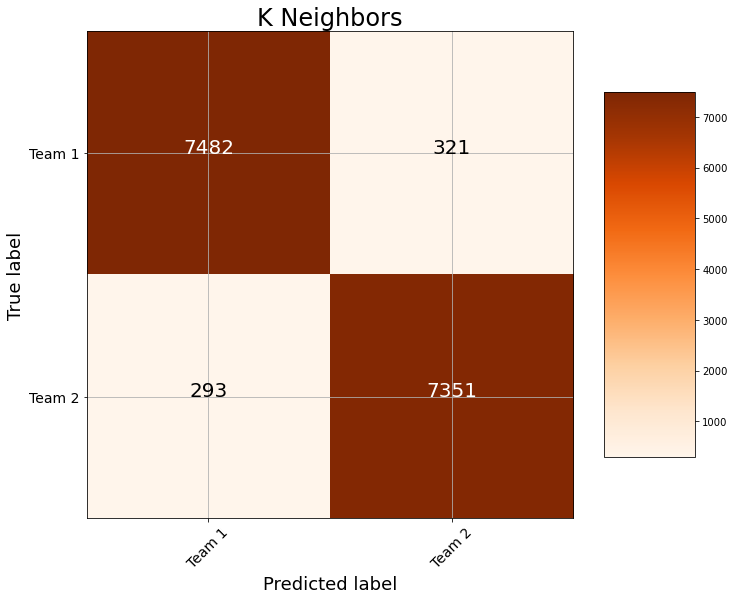

In [44]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
clf_knn.score(X_test, y_test)

cm = confusion_matrix(y_test, clf_knn.predict(X_test))
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'K Neighbors')

### GridCV

In [43]:
parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'verbose':[50, 100, 300]}

grid = GridSearchCV(LogisticRegression(), parameters) # overflowing of outputs and can't reduce the verbose, so i let it in comment
grid.fit(X_train, y_train)
print(grid.best_params_) #{'solver': 'sag', 'verbose': 50}

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

In [45]:
clf_gridCV = LogisticRegression(solver = 'sag', verbose = 50).fit(X_train, y_train)
clf_gridCV.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
convergence after 24 epochs took 1 seconds
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0.9616106687382663

Confusion matrix, without normalization
[[7510  293]
 [ 300 7344]]


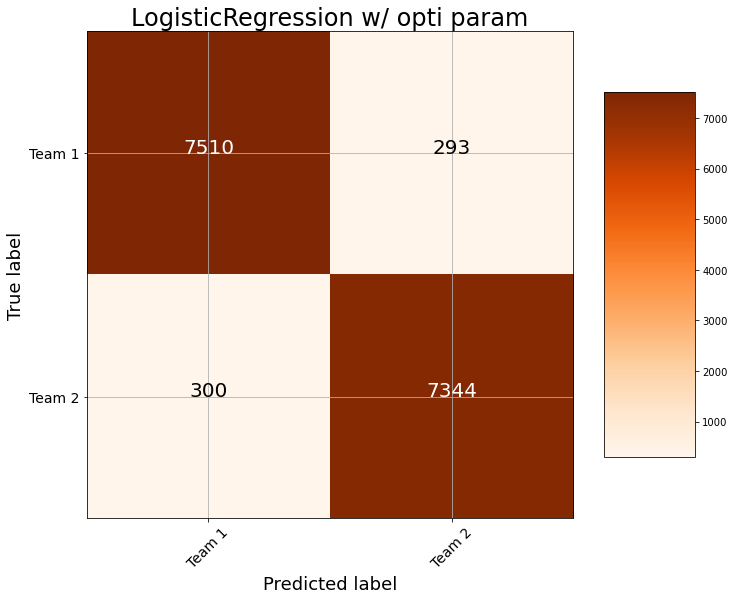

In [46]:
cm = confusion_matrix(y_test, clf_gridCV.predict(X_test))
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'LogisticRegression w/ opti param')

### Neural Network

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialisation du modèle de réseau de neurones
clf_nn = Sequential()

# Ajout des couches au modèle
clf_nn.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
clf_nn.add(Dense(32, activation='relu'))
clf_nn.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec une fonction de perte et une métrique
clf_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
clf_nn.fit(X_train, y_train, epochs=50, batch_size=16)


Epoch 1/50
2253/2253 [==============================] - 1s 482us/step - loss: 0.1149 - accuracy: 0.9536
Epoch 2/50
2253/2253 [==============================] - 1s 482us/step - loss: 0.0810 - accuracy: 0.9634
Epoch 3/50
2253/2253 [==============================] - 1s 477us/step - loss: 0.0743 - accuracy: 0.9655
Epoch 4/50
2253/2253 [==============================] - 1s 480us/step - loss: 0.0706 - accuracy: 0.9669
Epoch 5/50
2253/2253 [==============================] - 1s 521us/step - loss: 0.0691 - accuracy: 0.9680
Epoch 6/50
2253/2253 [==============================] - 1s 499us/step - loss: 0.0677 - accuracy: 0.9684
Epoch 7/50
2253/2253 [==============================] - 1s 500us/step - loss: 0.0662 - accuracy: 0.9698
Epoch 8/50
2253/2253 [==============================] - 1s 469us/step - loss: 0.0656 - accuracy: 0.9691
Epoch 9/50
2253/2253 [==============================] - 1s 480us/step - loss: 0.0648 - accuracy: 0.9698
Epoch 10/50
2253/2253 [==============================] - 1s 491u

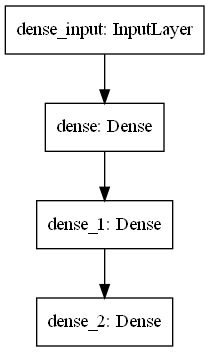

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(
    clf_nn,
    to_file="model.png",
)


In [54]:
prediction = (clf_nn.predict(X_test) > 0.5).astype("int32")

sum = 0
i = 0

for col_name, col_data in y_test.items():
    sum += 1*(col_data != prediction[i])
    i += 1

print(float(1 - sum/i))

0.9692496924969249


Confusion matrix, without normalization
[[7457  346]
 [ 129 7515]]


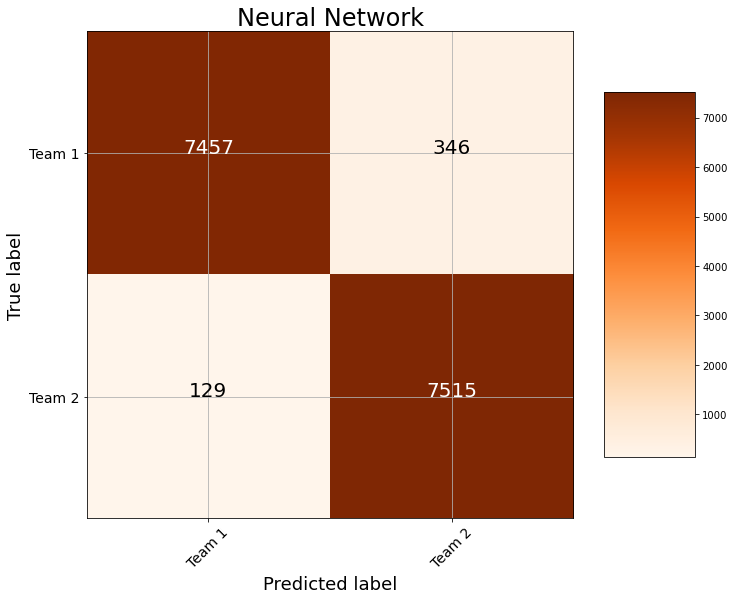

In [55]:
cm = confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'Neural Network')

### XGBoost

In [66]:
# import XGBoost
import xgboost as xgb

# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [67]:
from xgboost import XGBClassifier

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [68]:
xgb_clf.score(X_test, y_test)

0.9715802421182107

In [69]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [70]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.989695,0.000133,0.989572,0.000405
1,0.990112,0.003560,0.989939,0.003165
2,0.991768,0.002505,0.991484,0.002471
3,0.991995,0.002105,0.991719,0.001975
4,0.991384,0.002664,0.991181,0.002519


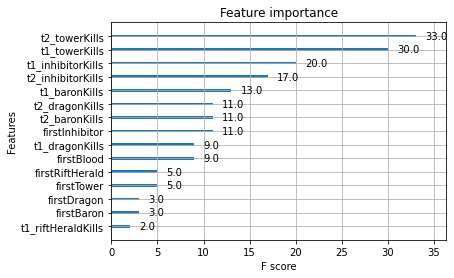

In [71]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

Confusion matrix, without normalization
[[7614  189]
 [ 250 7394]]


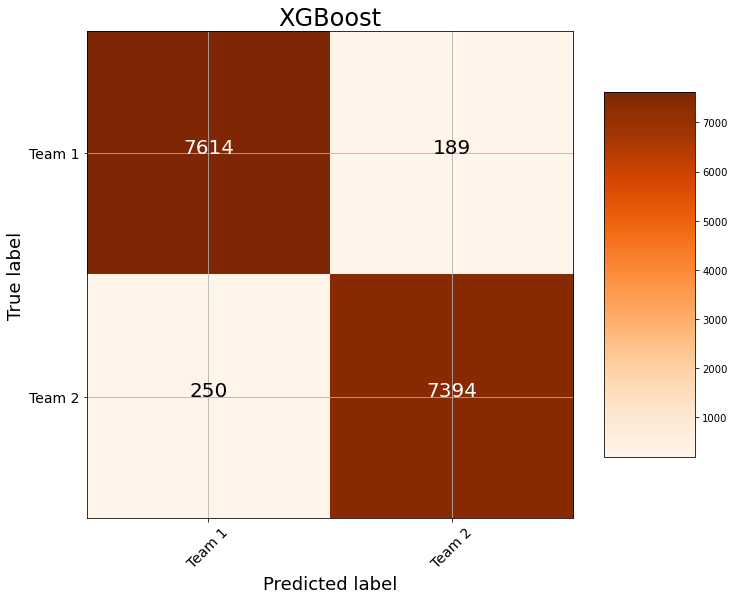

In [74]:
cm = confusion_matrix(y_test, xgb_clf.predict(X_test))
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'XGBoost')

In [73]:
from xgboost import XGBClassifier

# Initialisation du modèle XGBoost
model = XGBClassifier()

# Paramètres à tester
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}

# Grid Search pour trouver les meilleurs paramètres
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres trouvés
print(grid_search.best_params_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}


0.9719686670550916
Confusion matrix, without normalization
[[7629  174]
 [ 259 7385]]


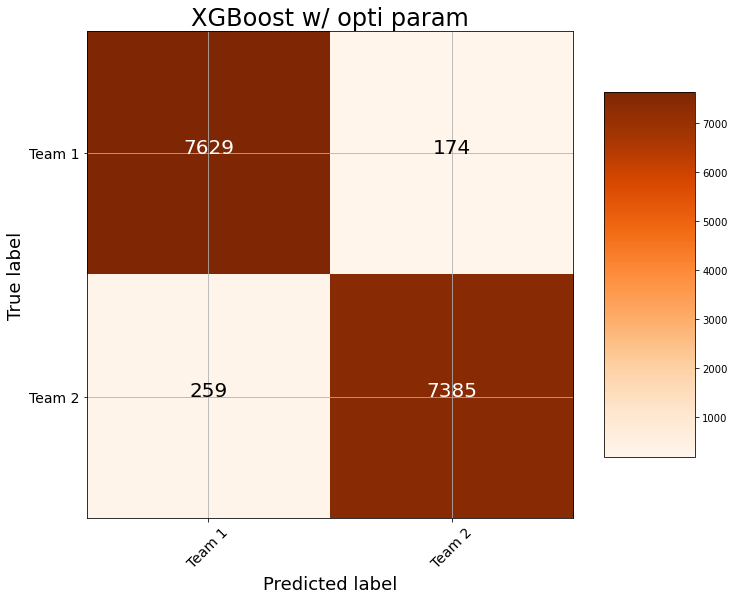

In [58]:
best_xgboost = XGBClassifier(learning_rate = 0.01, max_depth = 7, n_estimators = 1000).fit(X_train, y_train)
print(best_xgboost.score(X_test, y_test))

cm = confusion_matrix(y_test, best_xgboost.predict(X_test))
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'XGBoost w/ opti param')

## ROC Curves

In [76]:
no_skill_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = clf_lr.predict_proba(X_test)
nb_probs = clf_nb.predict_proba(X_test)
dt_probs = clf_dt.predict_proba(X_test)
rf_probs = clf_rf.predict_proba(X_test)
knn_probs = clf_knn.predict_proba(X_test)
best_model_probs = best_model.predict_proba(X_test)
NN_probs = clf_nn.predict_proba(X_test)
xgb_probs = xgb_clf.predict_proba(X_test)
best_xgb_probs = best_xgboost.predict_proba(X_test)
adaboost_probs = clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
knn_probs = knn_probs[:, 1]
best_model_probs = best_model_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
best_xgb_probs = best_xgb_probs[:, 1]
adaboost_probs = adaboost_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, no_skill_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
best_model_auc = roc_auc_score(y_test, best_model_probs)
NN_auc = roc_auc_score(y_test, NN_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
best_xgb_auc = roc_auc_score(y_test, best_xgb_probs)
ada_auc = roc_auc_score(y_test, adaboost_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('K neighbors: ROC AUC=%.3f' % (knn_auc))
print('Best forest: ROC AUC=%.3f' % (best_model_auc))
print('Neural Network: ROC AUC=%.3f' % (best_model_auc))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
print('Best XGBoost: ROC AUC=%.3f' % (best_xgb_auc))
print('Adaboost: ROC AUC=%.3f' % (ada_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_skill_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
best_model_fpr, best_model_tpr, _ = roc_curve(y_test, best_model_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, NN_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
best_xgb_fpr, best_xgb_tpr, _ = roc_curve(y_test, best_xgb_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, adaboost_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, label='Logistic')
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(knn_fpr, knn_tpr, label='K Neighbors')
plt.plot(best_model_fpr, best_model_tpr, label='Best Forest')
plt.plot(nn_fpr, nn_tpr, label='Neural Network')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')
plt.plot(best_xgb_fpr, best_xgb_tpr, label='Best XGBoost')
plt.plot(ada_fpr, ada_tpr, label='Adaboost')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

c:\Users\pirca\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 16 features, but DecisionTreeClassifier is expecting 1380 features as input.

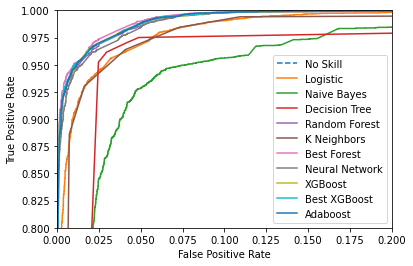

In [98]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, label='Logistic')
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(knn_fpr, knn_tpr, label='K Neighbors')
plt.plot(best_model_fpr, best_model_tpr, label='Best Forest')
plt.plot(nn_fpr, nn_tpr, label='Neural Network')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')
plt.plot(best_xgb_fpr, best_xgb_tpr, label='Best XGBoost')
plt.plot(ada_fpr, ada_tpr, label='Adaboost')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.ylim(0.8, 1)
plt.xlim(0, 0.2)

# show the plot
plt.show()

In [75]:
from collections import Counter

# Liste des prédictions de chaque modèle
model_pred = [clf_lr.predict(X_test), clf_nb.predict(X_test), clf_dt.predict(X_test), clf_rf.predict(X_test), clf_knn.predict(X_test), best_model.predict(X_test), clf_nn.predict(X_test), xgb_clf.predict(X_test), best_xgboost.predict(X_test), clf.predict(X_test)]

# Effectuer le vote majoritaire
def majority_vote(predictions):
    counter = Counter(predictions)
    winner, _ = counter.most_common(1)[0]
    return winner

predictions = []
for i in range(len(model_pred[0])):
    models_predictions = []
    for j in range(len(model_pred)):
        models_predictions.append(int(model_pred[j][i]))

    predictions.append(majority_vote(models_predictions))


sum = 0
i = 0

for col_name, col_data in y_test.items():
    sum += 1*(col_data != predictions[i])
    i += 1

print(float(1 - sum/i))


c:\Users\pirca\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 16 features, but DecisionTreeClassifier is expecting 1380 features as input.

In [61]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators = 126, min_samples_split = 10, max_leaf_nodes = 40,
 max_features = 0.5, max_depth = 17, bootstrap = True), n_estimators=200, learning_rate=0.1, random_state=42)

# Former le modèle Adaboost sur l'ensemble d'entraînement
clf.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = clf.predict(X_test)

c:\Users\pirca\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [62]:
# Calculer la précision du modèle
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9713212921602901


Confusion matrix, without normalization
[[7617  186]
 [ 257 7387]]


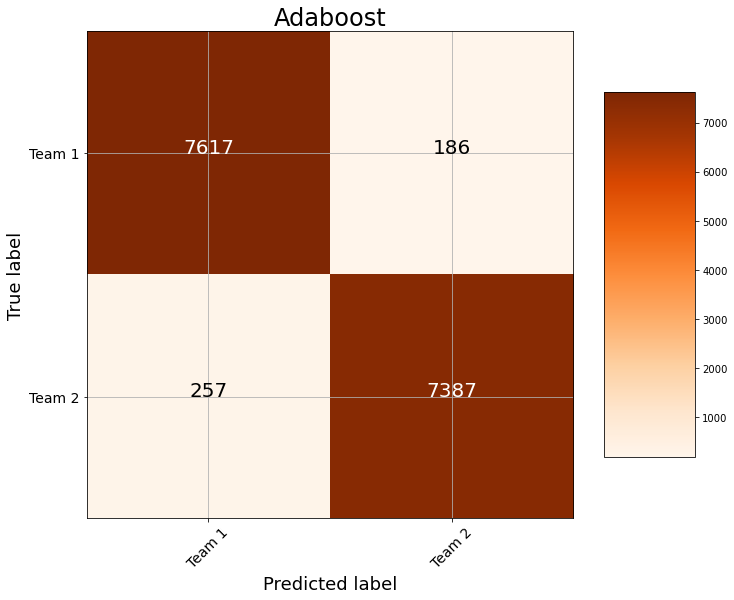

In [63]:
cm = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(cm, classes = ['Team 1', 'Team 2'],
                      title = 'Adaboost')